In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yehiahassanain_seat_belt2_path = kagglehub.dataset_download('yehiahassanain/seat-belt2')

print('Data source import complete.')

100%|██████████| 486M/486M [00:12<00:00, 39.5MB/s]

Extracting files...


Data source import complete.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
seat_belt_train_dir = os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', 'Train', 'Seat_Belt')
SeatBelt = os.listdir(seat_belt_train_dir) # Uncomment this line to define SeatBelt using the downloaded path
print(SeatBelt[:5])  # print the first five elements
print(SeatBelt[-5:]) # print the last five elements of the list

without_seat_belt_train_dir = os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', 'Train', 'WithoutSeat_Belt')
WithoutSeatBelt=os.listdir(without_seat_belt_train_dir)
print(WithoutSeatBelt[:5])  # print the first five elements
print(WithoutSeatBelt[-5:]) # print the last five elements of the list

['seatbelt 1804.jpg', 'seatbelt 4290.jpg', 'seatbelt 1652.jpg', 'seatbelt 4254.jpg', 'seatbelt 4017.jpg']
['seatbelt 4267.jpg', 'seatbelt 4116.jpg', 'seatbelt 1691.jpg', 'seatbelt 3567.jpg', 'seatbelt 2454.jpg']
['withoutseatbelt_ 3344.jpg', 'withoutseatbelt_ 3012.jpg', 'train_witout_seatbelt_original_withoutseatbelt_ 2553.jpg_8ae129c8-46c4-4a82-96f8-bd320ac26448.jpg', 'new8.jpg', 'withoutseatbelt_ 1226.jpg']
['withoutseatbelt_ 992.jpg', 'withoutseatbelt_ 2925.jpg', '771_jpg.rf.67bd83813adf0df7523f696efc2361fd.jpg', '946_jpg.rf.200360deef2b74342a7f43ce0fdd6240.jpg', 'withoutseatbelt_ 3532.jpg']


In [4]:
print('Number of images with SeatBelt:',len(SeatBelt))
print('number of images WithoutSeatBelt:',len(WithoutSeatBelt))

Number of images with SeatBelt: 3700
number of images WithoutSeatBelt: 3318


In [5]:
#creating the labels
SeatBelt_labels = [0]*len(SeatBelt)
WithoutSeatBelt_labels = [1]*len(WithoutSeatBelt)
#SeatBelt_labels = [0]*len(SeatBelt)：將所有「有安全帶」的圖片對應的標籤都設為 0。
#WithoutSeatBelt_labels = [1]*len(WithoutSeatBelt)：將所有「沒有安全帶」的圖片對應的標籤都設為 1。

print(SeatBelt_labels[:5])
print(WithoutSeatBelt_labels[:5])

print(len(SeatBelt_labels))
print(len(WithoutSeatBelt_labels))

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
3700
3318


In [6]:
labels = SeatBelt_labels+WithoutSeatBelt_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7018
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


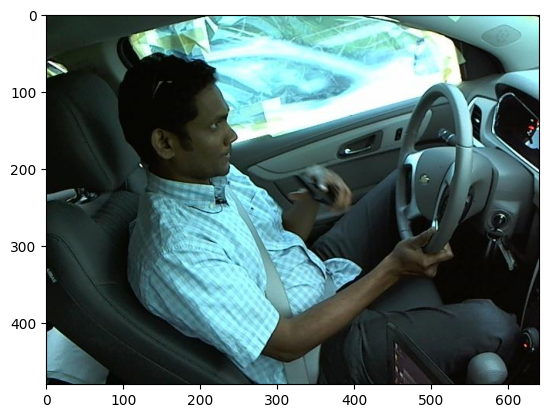

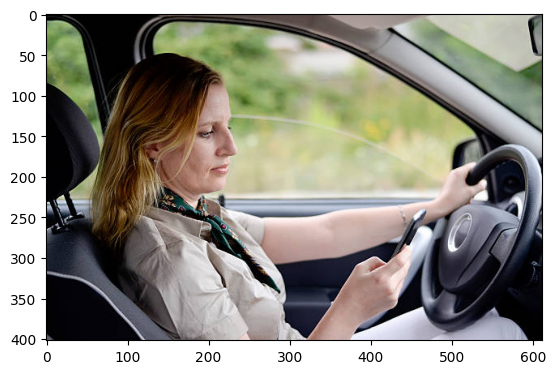

In [7]:
# displaying image with seat belt
# Construct the full path to the image using the downloaded dataset path
seat_belt_image_path = os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', 'Train', 'Seat_Belt', 'seatbelt 1000.jpg')

# Check if the file exists before trying to read it (optional but good practice)
if os.path.exists(seat_belt_image_path):
    img = mpimg.imread(seat_belt_image_path)  # read the image into numpy array
    imgplot = plt.imshow(img)
    plt.show()
else:
    print(f"Error: Image file not found at {seat_belt_image_path}")

# displaying image without seat belt
without_seat_belt_image_path = os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', 'Test', 'WithoutSeat_Belt', '.639.jpg')

# Check if the file exists before trying to read it (optional but good practice)
if os.path.exists(without_seat_belt_image_path):
    img = mpimg.imread(without_seat_belt_image_path) # read the image into numpy array
    imgplot = plt.imshow(img)
    plt.show()
else:
    print(f"Error: Image file not found at {without_seat_belt_image_path}")

In [8]:
def convert_images_to_numpy(image_dir, target_size=(128, 128)):
    data = []
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        if os.path.isfile(img_path):
            with Image.open(img_path) as image:
                image = image.resize(target_size)  # Resize image
                image = image.convert('RGB')       # Convert to RGB
                image_array = np.array(image)      # Convert to numpy array
                data.append(image_array)
    return data

# Paths to the directories containing images
SeatBelt_path = os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', 'Train', 'Seat_Belt')
WithoutSeatBelt_path = os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', 'Train', 'WithoutSeat_Belt')

# Convert images in both directories to numpy arrays
data_SeatBelt = convert_images_to_numpy(SeatBelt_path)
data_WithoutSeatBelt = convert_images_to_numpy(WithoutSeatBelt_path)

# Combine the data from both directories
data = data_SeatBelt + data_WithoutSeatBelt
'''
這部分的程式碼負責載入、處理和準備影像資料，以便用於訓練機器學習模型。它定義了一個函式，用於將影像轉換為適合數值處理的格式，然後將這個函式應用於包含影像的目錄。
'''

'\n這部分的程式碼負責載入、處理和準備影像資料，以便用於訓練機器學習模型。它定義了一個函式，用於將影像轉換為適合數值處理的格式，然後將這個函式應用於包含影像的目錄。\n'

array([[[ 46,  52,  48],
        [ 46,  52,  48],
        [ 46,  52,  48],
        ...,
        [254, 253, 253],
        [255, 253, 254],
        [254, 254, 253]],

       [[ 46,  52,  48],
        [ 46,  52,  48],
        [ 46,  52,  48],
        ...,
        [239, 255, 243],
        [251, 255, 251],
        [255, 253, 255]],

       [[ 47,  53,  49],
        [ 47,  53,  49],
        [ 47,  53,  49],
        ...,
        [195, 233, 202],
        [230, 251, 233],
        [249, 255, 249]],

       ...,

       [[ 30,  39,  37],
        [ 29,  38,  39],
        [ 30,  40,  45],
        ...,
        [ 43,  56,  76],
        [ 33,  45,  62],
        [ 61,  81,  94]],

       [[ 33,  44,  43],
        [ 22,  31,  32],
        [ 24,  30,  34],
        ...,
        [ 39,  48,  64],
        [ 28,  35,  48],
        [ 63,  78,  86]],

       [[ 33,  46,  50],
        [ 32,  41,  43],
        [ 15,  20,  21],
        ...,
        [ 35,  41,  58],
        [ 22,  26,  41],
        [ 54,  66,  75]]], dtype=uint8)
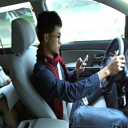

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
X = np.array(data)

In [24]:
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
print(X.shape, x_train.shape, x_test.shape)

(7018, 128, 128, 3) (5614, 128, 128, 3) (1404, 128, 128, 3)


In [29]:
#scaling the data

x_train_scaled =  x_train/255   #to change the value from 0 to 1


x_test_scaled = x_test/255

x_train_scaled[0]

array([[[0.24313725, 0.24705882, 0.22745098],
        [0.24313725, 0.24705882, 0.22745098],
        [0.24705882, 0.25098039, 0.23137255],
        ...,
        [0.36862745, 0.37647059, 0.32941176],
        [0.36862745, 0.37647059, 0.3372549 ],
        [0.45882353, 0.45098039, 0.31764706]],

       [[0.23921569, 0.24313725, 0.22352941],
        [0.23921569, 0.24313725, 0.22352941],
        [0.24705882, 0.25098039, 0.23137255],
        ...,
        [0.36470588, 0.37254902, 0.34117647],
        [0.36078431, 0.36862745, 0.34509804],
        [0.37254902, 0.38039216, 0.32941176]],

       [[0.24313725, 0.24705882, 0.22745098],
        [0.24313725, 0.24705882, 0.22745098],
        [0.24705882, 0.25098039, 0.23137255],
        ...,
        [0.36862745, 0.38039216, 0.34901961],
        [0.36470588, 0.37647059, 0.33333333],
        [0.36470588, 0.36862745, 0.34509804]],

       ...,

       [[0.16862745, 0.16862745, 0.36470588],
        [0.16470588, 0.16862745, 0.36862745],
        [0.16078431, 0

In [30]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

# Convert integer class labels to one-hot encoded vectors, Y_train  should contains integer class labels

Y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_of_classes)


Y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_of_classes)

In [31]:
Y_train_one_hot

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

別人的方法：  
CNN模型

In [32]:
#別人的方法
#建立卷積神經網路 (CNN) 模型
# Define the input shape of the images (128x128 pixels with 3 color channels for RGB)
input_shape = (128, 128, 3)

# Define and compile your model
model = keras.Sequential([

    # First convolutional layer:
    # 32 filters, each 3x3 kernel size, ReLU activation function, input shape specified
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),

    # Batch normalization layer: normalizes the output of the previous layer
    keras.layers.BatchNormalization(),

    # Max pooling layer: reduces the spatial dimensions by taking the max value in 2x2 pools
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer:
    # 64 filters, each 3x3 kernel size, ReLU activation function
    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Batch normalization layer: normalizes the output of the previous layer
    keras.layers.BatchNormalization(),

    # Max pooling layer: reduces the spatial dimensions by taking the max value in 2x2 pools
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer:
    # 128 filters, each 3x3 kernel size, ReLU activation function
    keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # Batch normalization layer: normalizes the output of the previous layer
    keras.layers.BatchNormalization(),

    # Max pooling layer: reduces the spatial dimensions by taking the max value in 2x2 pools
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer: flattens the 3D output of the convolutional layers to 1D for fully connected layers
    keras.layers.Flatten(),

    # Fully connected (dense) layer: 128 neurons, ReLU activation function
    keras.layers.Dense(128, activation='relu'),

    # Dropout layer: randomly sets 50% of the neurons to zero during training to prevent overfitting
    keras.layers.Dropout(0.5),

    # Output layer: number of neurons equal to the number of classes, softmax activation function for classification
    keras.layers.Dense(num_of_classes, activation='softmax')
])



In [33]:
#compile the nerual network
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(x_train_scaled, Y_train_one_hot, validation_split=0.1, epochs=10)

loss,accuracy = model.evaluate(x_test_scaled,Y_test_one_hot)
print('Test Accuracy= ', accuracy)

Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9536 - loss: 0.5425 - val_accuracy: 0.9448 - val_loss: 0.3373
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9970 - loss: 0.0389 - val_accuracy: 0.9858 - val_loss: 0.1356
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9982 - loss: 0.0279 - val_accuracy: 0.9715 - val_loss: 0.6418
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9964 - loss: 0.0847 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9987 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 1.8030e-08
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 0.9858 - val_loss: 0.2336
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9963 - loss: 0.1104 - val_accuracy: 0.4662 - val_loss: 202.4982
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9987 - loss: 0.053

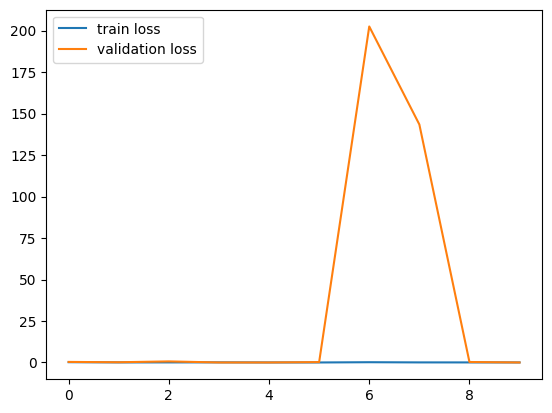

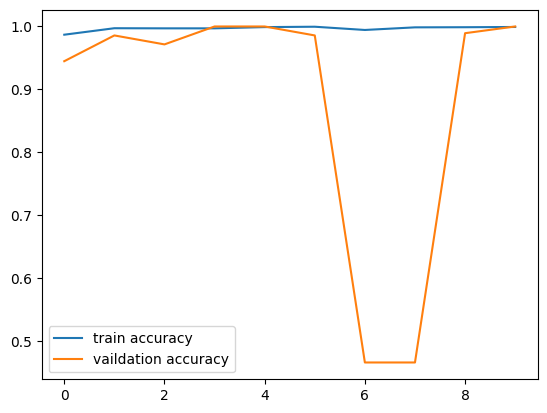

In [35]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='vaildation accuracy')
plt.legend()
plt.show()

In [ ]:
from IPython.display import display, HTML
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Ensure yehiahassanain_seat_belt2_path is defined (from the initial Kaggle import cell)
# If running this cell independently, you might need to define or retrieve this variable.
# For this notebook's context, it's assumed to be available from previous cells.

# List of relative image paths within the test directories
relative_image_paths = [
    'Test/WithoutSeat_Belt/.566.jpg',
    'Test/WithoutSeat_Belt/.745.jpg',
    'Test/WithoutSeat_Belt/.965.jpg',
    'Test/WithoutSeat_Belt/.999.jpg',
    'Test/WithoutSeat_Belt/101_jpg.rf.26df21eb9e7aaa6bb42e804c2838f5c8.jpg',
    'Test/WithoutSeat_Belt/1-MaleGlasses_mp4-7_jpg.rf.b8aee1bfb388aa45af4fbe4d418d2399.jpg',
    'Test/WithoutSeat_Belt/165_jpg.rf.20ad4a10a562c3b5d9707a4f2147b08d.jpg',
    'Test/Seat_Belt/seatbelt 200.jpg',
    'Test/WithoutSeat_Belt/.770.jpg',
    'Test/WithoutSeat_Belt/.920.jpg',
    'Test/Seat_Belt/seatbelt 605.jpg',
    'Test/WithoutSeat_Belt/.974.jpg',
    'Test/Seat_Belt/seatbelt 594.jpg',
    'Test/WithoutSeat_Belt/120_jpg.rf.d48bad28f6a4890d61710ddd852318ad.jpg',
    'Test/WithoutSeat_Belt/10_jpg.rf.b088f394235b5fa3edbeaafe6237190e.jpg',
    'Test/WithoutSeat_Belt/150_jpg.rf.d7588c7964e56ef3a2fee43.jpg', # Corrected path based on train set structure
    'Test/WithoutSeat_Belt/195_jpg.rf.fa04de01c397f5d3d77196b63ef20cb9.jpg',
    'Test/Seat_Belt/seatbelt 560.jpg',
    'Test/Seat_Belt/seatbelt 556.jpg',
    # Add more relative paths as needed
]

# Assuming yehiahassanain_seat_belt2_path is already defined from the first cell
# Construct the full image paths using the downloaded dataset path
full_image_paths = [os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', relative_path) for relative_path in relative_image_paths]


for image_path in full_image_paths:
    # Check if the file exists before trying to read it (optional but good practice)
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        continue # Skip to the next image if the current one is not found

    # Read the image into a numpy array
    # Use cv2.imread as it's generally more robust for various image types
    input_image = cv2.imread(image_path)

    # Convert BGR to RGB (cv2.imread reads in BGR by default, matplotlib expects RGB)
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)


    # Display the image
    plt.imshow(input_image_rgb)
    plt.axis('off') # Hide axes
    plt.show()

    # Resize the image to 128x128
    input_image_resized = cv2.resize(input_image, (128, 128))

    # Scale the image
    input_image_scaled = input_image_resized / 255.0

    # Reshape the image
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Predict the label of the image
    input_prediction = model.predict(input_image_reshaped)

    # Print the prediction
    print(f"Raw prediction probabilities: {input_prediction}")

    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)

    # Print the label and the corresponding message
    print(f"Predicted label index: {input_pred_label}")
    if input_pred_label == 0:
        display(HTML('<p style="color:green; font-weight:bold;">Image verified, Seatbelt Detected.</p>'))
    elif input_pred_label == 1:
        display(HTML('<p style="color:red; font-weight:bold;">Image verified, No Seatbelt Detected.</p>'))
    print('\n\n')

我的方法：  
修改模型及相關參數，並加上資料擴增

Found 7017 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Detected 2 classes.
Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 65s 272ms/step - accuracy: 0.9101 - loss: 0.2076 - val_accuracy: 0.5000 - val_loss: 2.0263
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 59s 270ms/step - accuracy: 0.9948 - loss: 0.0186 - val_accuracy: 0.5094 - val_loss: 1.2688
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 58s 264ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9925 - val_loss: 0.0243
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 57s 261ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9544 - val_loss: 0.1616
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 56s 256ms/step - accuracy: 0.9958 - loss: 0.0146 - val_accuracy: 0.9444 - val_loss: 0.2647
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 58s 264ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.8825 - val_loss: 0.4278
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 63s 285ms/step - accuracy: 0.9982 - loss: 0.0063 - val_accuracy: 0.991

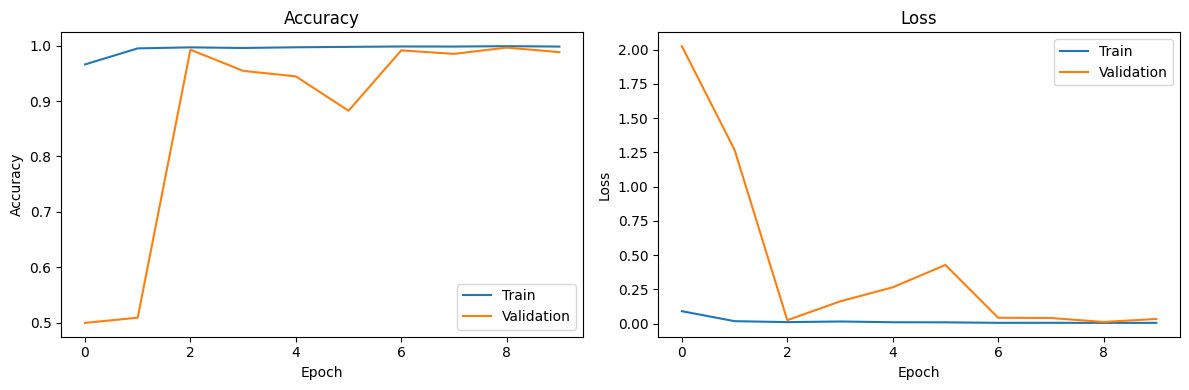

In [48]:
#my model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 資料擴充設定
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dir_path = os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', 'Train') # Adjust path based on the actual directory structure
# Assuming the validation data is in a 'Test' directory with similar structure
validation_dir_path = os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', 'Test') # Adjust path if validation data is elsewhere


# 載入訓練與驗證資料
train_generator = train_datagen.flow_from_directory(
    train_dir_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

#num_of_classes = len(train_generator.class_indices)
num_of_classes = len(train_generator.class_indices)
print(f"Detected {num_of_classes} classes.")

# 改良 CNN 模型
model1 = keras.Sequential([
    keras.layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.SeparableConv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.SeparableConv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),# 用這個取代 Flatten

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

# 編譯模型
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)
test_loss, test_acc = model1.evaluate(validation_generator)
print(f"Test Accuracy:", test_acc)


# 畫出訓練過程
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import display, HTML
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Ensure yehiahassanain_seat_belt2_path is defined (from the initial Kaggle import cell)
# If running this cell independently, you might need to define or retrieve this variable.
# For this notebook's context, it's assumed to be available from previous cells.

# List of relative image paths within the test directories
relative_image_paths = [
    'Test/WithoutSeat_Belt/.566.jpg',
    'Test/WithoutSeat_Belt/.745.jpg',
    'Test/WithoutSeat_Belt/.965.jpg',
    'Test/WithoutSeat_Belt/.999.jpg',
    'Test/WithoutSeat_Belt/101_jpg.rf.26df21eb9e7aaa6bb42e804c2838f5c8.jpg',
    'Test/WithoutSeat_Belt/1-MaleGlasses_mp4-7_jpg.rf.b8aee1bfb388aa45af4fbe4d418d2399.jpg',
    'Test/WithoutSeat_Belt/165_jpg.rf.20ad4a10a562c3b5d9707a4f2147b08d.jpg',
    'Test/Seat_Belt/seatbelt 200.jpg',
    'Test/WithoutSeat_Belt/.770.jpg',
    'Test/WithoutSeat_Belt/.920.jpg',
    'Test/Seat_Belt/seatbelt 605.jpg',
    'Test/WithoutSeat_Belt/.974.jpg',
    'Test/Seat_Belt/seatbelt 594.jpg',
    'Test/WithoutSeat_Belt/120_jpg.rf.d48bad28f6a4890d61710ddd852318ad.jpg',
    'Test/WithoutSeat_Belt/10_jpg.rf.b088f394235b5fa3edbeaafe6237190e.jpg',
    'Test/WithoutSeat_Belt/150_jpg.rf.d7588c7964e56ef3a2fee43.jpg', # Corrected path based on train set structure
    'Test/WithoutSeat_Belt/195_jpg.rf.fa04de01c397f5d3d77196b63ef20cb9.jpg',
    'Test/Seat_Belt/seatbelt 560.jpg',
    'Test/Seat_Belt/seatbelt 556.jpg',
    # Add more relative paths as needed
]

# Assuming yehiahassanain_seat_belt2_path is already defined from the first cell
# Construct the full image paths using the downloaded dataset path
full_image_paths = [os.path.join(yehiahassanain_seat_belt2_path, 'Seat_Belt2', relative_path) for relative_path in relative_image_paths]


for image_path in full_image_paths:
    # Check if the file exists before trying to read it (optional but good practice)
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        continue # Skip to the next image if the current one is not found

    # Read the image into a numpy array
    # Use cv2.imread as it's generally more robust for various image types
    input_image = cv2.imread(image_path)

    # Convert BGR to RGB (cv2.imread reads in BGR by default, matplotlib expects RGB)
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)


    # Display the image
    plt.imshow(input_image_rgb)
    plt.axis('off') # Hide axes
    plt.show()

    # Resize the image to 128x128
    input_image_resized = cv2.resize(input_image, (128, 128))

    # Scale the image
    input_image_scaled = input_image_resized / 255.0

    # Reshape the image
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Predict the label of the image
    input_prediction = model1.predict(input_image_reshaped)

    # Print the prediction
    print(f"Raw prediction probabilities: {input_prediction}")

    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)

    # Print the label and the corresponding message
    print(f"Predicted label index: {input_pred_label}")
    if input_pred_label == 0:
        display(HTML('<p style="color:green; font-weight:bold;">Image verified, Seatbelt Detected.</p>'))
    elif input_pred_label == 1:
        display(HTML('<p style="color:red; font-weight:bold;">Image verified, No Seatbelt Detected.</p>'))
    print('\n\n')